# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Predicting pulsar stars in the universe (Python 2)

## I. Definition

### Project Overview

Pulsars are member of a family of stars, called neutron stars. They are highly dense spherical objects about the size of a large city (e.g. 20 km in diameter) with mass of several times that of Sun, which is of about 1.4 million km in diameter. They are called pulsars because they radiate two focused beams of light in opposite directions, which usually don’t align with their axis of rotation (similar to a lighthouse). The frequencies of these pulses are so accurate that they can rival atomic clocks which are the most precise clocks known to us. The reason behind choosing this topic is to gain a good understanding on which features are observed in a pulsar, so that we can get better at finding them, and also given a bunch of relevant features associated to celestial objects, we can classify them as pulsars. In this project I did a comparative study of performance with multiple classifiers, which will help us to identify a pulsar, given the set of features very effectively. Our dataset can be found here. [source] (https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star)

### Problem Statement

The objective here is to classify the celestial objects to two categories: pulsar and non-pulsar with very high accuracy and precision. This is important because pulsars serve many scientific purposes like below:

1.	They give information about the physics of the matter inside them. Under such incredible pressure (second to only black holes) matter behaves quite differently. Hence, it works as very good resource materials, because such extreme environments can’t be practically created (yet) in a test lab on earth.
2.	Pulsars are extremely accurate in emitting their pulses, as mentioned before. Hence observing the changes in a pulsar’s blinking provides information about what’s happening in its vicinity. Also, these can be used as a clock for scientific experiments which require precise timing.
3.	Pulsars are useful in finding extrasolar planets. In fact, the first extrasolar planet was found orbiting a pulsar.
4.	They help in testing aspects of Albert Einstein’s theory of general relativity.

#### Approach towards finding a solution
1. Choose a set of classifiers, spanning from simple to relatively complex ones.
2. Train these classifiers and see which one of these give the best performance.
3. While choosing among the classifiers, make sure we tune all hyperparameters, and only then compare among the optimal versions of each classifiers.
4. Use K-fold cross validation to minimize selection bias of test and train data. Run grid search on each fold for tuning and selecting best hyperparameters.

----
### Metrics
**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions. In other words it is the ratio of

[(True Positives + True Negatives)/(True Positives + True Negatives + False Positives + False Negatives)]

**Precision** tells us what proportion of our predictions are correct. It is a ratio of true positives (stars classified as pulsars, which are actually pulsars) to all positives (all stars classified as pulsars, irrespective of whether they are actually pulsar or not), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

**Recall** tells us what proportion of stars that actually were pulsars were classified by us as pulsars. It is a ratio of true positives (stars classified as pulsars, which are actually pulsars) to all the stars that were actually pulsars, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed (like ours, which we'll see later) in their classification distributions, accuracy by itself is not a very good metric. For such cases, precision and recall become useful. These two metrics can be combined to get the F-beta score, which is a weighted average (harmonic mean with a factor beta) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F-beta score.

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In our case, we'd consider accuracy and recall over precision as our performance metric, because in the dataset, percentage of pulsars are pretty low. So, we wouldn't want to lose out on detecting the actual pulsars, i.e. we better capture all the stars which are pulsars, it matters less if we classify some non-pulsars as pulsars. So, we'll choose the beta value as 2.

## II. Analysis

### Data Exploration
Our dataset consists of a csv file with almost 18000 entries, and it’s obtained from Kaggle dataset. The input feature set consists of 8 continuous variables mentioned below, whose names are also self-explanatory:
1.	Mean of the integrated profile. 
2.	Standard deviation of the integrated profile. 
3.	Excess kurtosis of the integrated profile. 
4.	Skewness of the integrated profile. 
5.	Mean of the DM-SNR curve. 
6.	Standard deviation of the DM-SNR curve. 
7.	Excess kurtosis of the DM-SNR curve. 
8.	Skewness of the DM-SNR curve. 

This is a binary classification problem. So based on these features we need to decide whether the object is a pulsar or not. This metric is given by the variable class, where 1 means pulsar, and 0 otherwise. Without these metrices, detecting real pulsars from false ones would become tricky, because many of the pulses detected through instruments are from noise and radio frequency interference.


In [104]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("pulsar_stars.csv")

# Success - Display the first record
display(data.head(n=10))

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [105]:
data.rename(columns={" Mean of the integrated profile": 'mean', ' Standard deviation of the integrated profile': 'std', ' Excess kurtosis of the integrated profile': 'excess_kurtosis', ' Skewness of the integrated profile': 'skewness', ' Mean of the DM-SNR curve': 'mean_curve', ' Standard deviation of the DM-SNR curve': 'std_curve', ' Excess kurtosis of the DM-SNR curve': 'excess_kurtosis_curve', ' Skewness of the DM-SNR curve': 'skewness_curve'}, inplace=True)
display(data.head(n=10))

,mean,std,excess_kurtosis,skewness,mean_curve,std_curve,excess_kurtosis_curve,skewness_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [106]:
data.describe()

,mean,std,excess_kurtosis,skewness,mean_curve,std_curve,excess_kurtosis_curve,skewness_curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [107]:
for col in data.columns:
    print("Skewness of {} is {}".format(col, data[col].skew()))
    print("Kurtosis of {} is {}\n".format(col, data[col].kurt()))

Skewness of mean is -1.37518764527
Kurtosis of mean is 2.97237382938

Skewness of std is 0.126641077218
Kurtosis of std is 1.68957138446

Skewness of excess_kurtosis is 3.63840966401
Kurtosis of excess_kurtosis is 14.6397421156

Skewness of skewness is 5.181293444
Kurtosis of skewness is 30.1664787706

Skewness of mean_curve is 3.68330212214
Kurtosis of mean_curve is 14.0647209602

Skewness of std_curve is 1.89425413024
Kurtosis of std_curve is 2.82599745836

Skewness of excess_kurtosis_curve is 0.441500865176
Kurtosis of excess_kurtosis_curve is 1.52620936599

Skewness of skewness_curve is 2.7345135594
Kurtosis of skewness_curve is 13.4941129851

Skewness of target_class is 2.83235300676
Kurtosis of target_class is 6.02289656697



We can see some of these features are positively skewed while others are more or less symmetric.

### Exploratory Visualization

In [108]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
def func(ip):
    if ip == 1:
        return 1
    else:
        return 0

n_pulsar = data['target_class'].apply(lambda elem: func(elem)).sum(axis=0)

# TODO: Number of records where individual's income is at most $50,000
n_non_pulsar = n_records - n_pulsar

# TODO: Percentage of individuals whose income is more than $50,000
pulsar_percent = n_pulsar * 100/ n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of pulsars: {}".format(n_pulsar))
print("Total number of non-pulsars: {}".format(n_non_pulsar))
print("Percentage of pulsars in the dataset: {}%".format(pulsar_percent))

Total number of records: 17898
Total number of pulsars: 1639
Total number of non-pulsars: 16259
Percentage of pulsars in the dataset: 9.15744775953%


We can see only around 9% of the data are pulsars, rest 91% are non-pulsars.

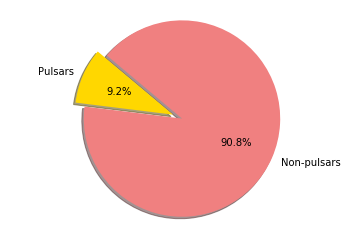

In [109]:
# Data to plot
labels = 'Pulsars', 'Non-pulsars'
sizes = [n_pulsar, n_non_pulsar]
colors = ['gold','lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [110]:
# Split the data into features and target label
target_raw = data['target_class']
features_raw = data.drop('target_class', axis = 1)

In [111]:
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    # Create figure
    fig = plt.figure(figsize = (15,20));

    colors  = ["r","g","b","c","m","y","lightseagreen","lightblue"]
    for i, feature in enumerate(features_raw.columns, 1):
        ax = fig.add_subplot(4, 2, i)
        ax.hist(data[feature], bins = 100, color=colors[i-1])
        plt.axvline(data[feature].mean(),color = "k",linestyle="dashed",label="MEAN")
        plt.axvline(data[feature].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
        plt.legend(loc="upper right")
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 3000))
        ax.set_yticks([0, 500, 1000, 1500, 2000, 2500])
        ax.set_yticklabels([0, 500, 1000, 1500, 2000, ">2500"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

Let's look at the distribution of all input features.

/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


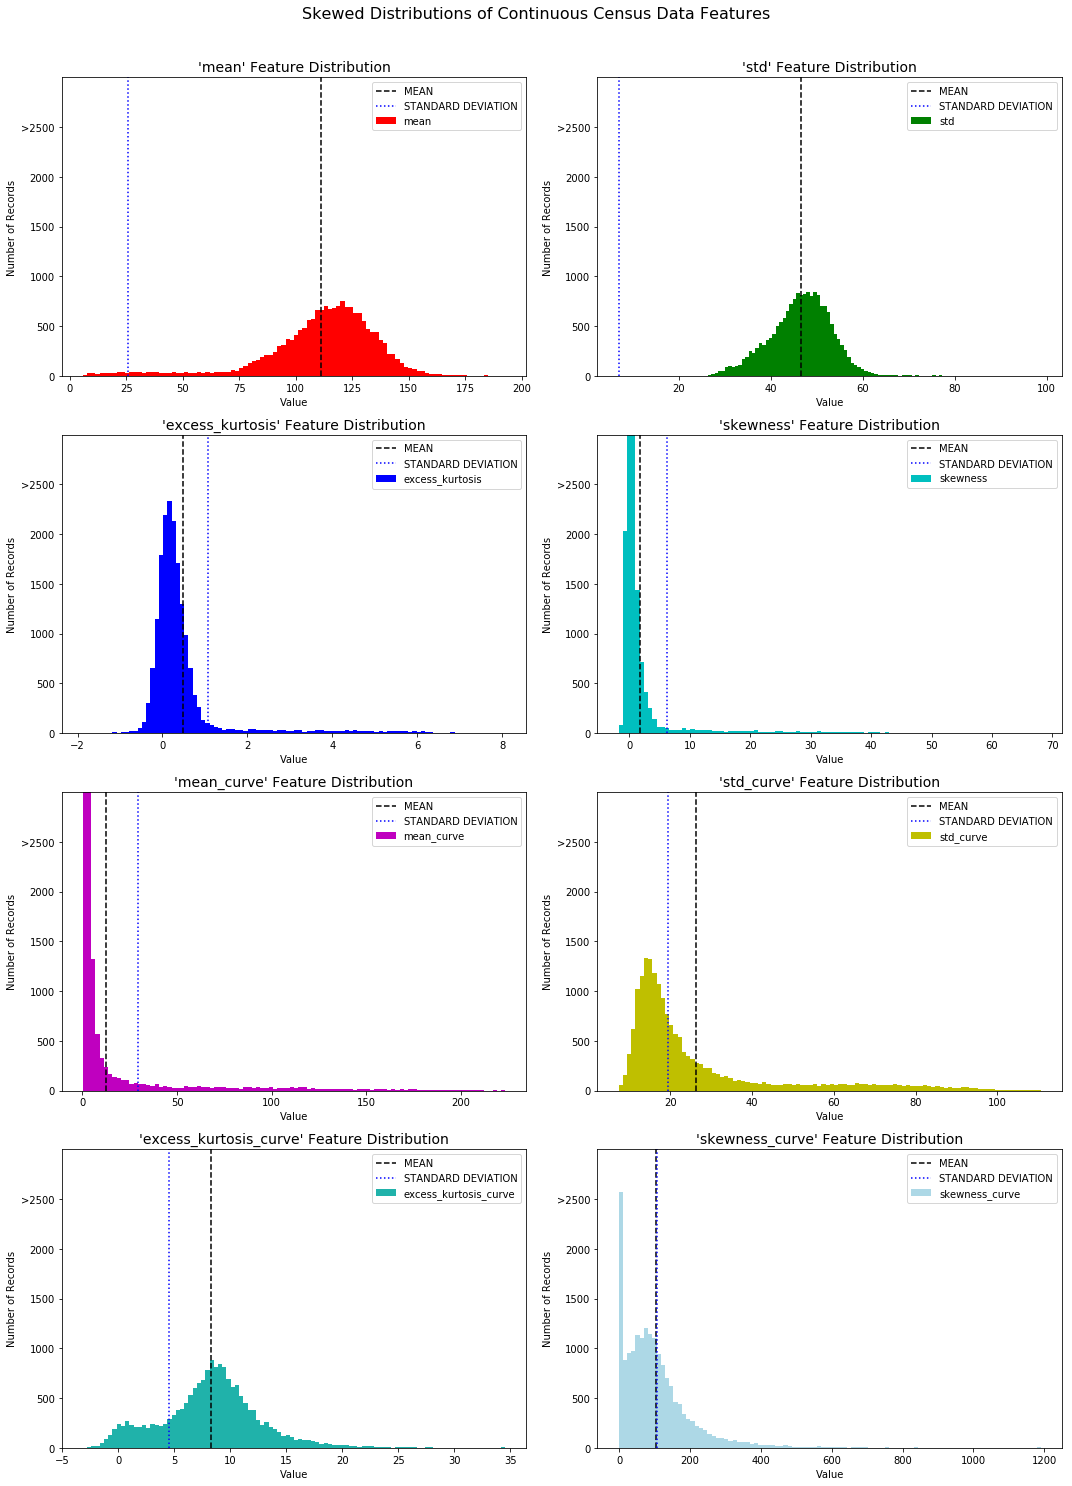

In [112]:
# Visualize skewed continuous features of original data
distribution(data)

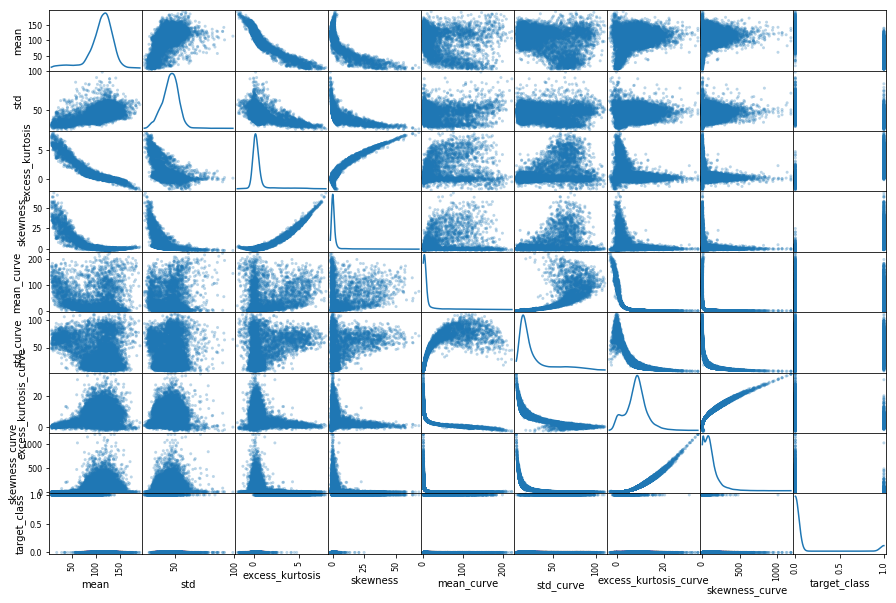

In [113]:
# Produce a scatter matrix for each pair of features in the data

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (15,10), diagonal = 'kde');

We can see from the above plot, that only `skewness` and `excess kurtosis` has a fair degree of linear correlation. Rest of the pairs don't share such relations. This will become apparent from the table and heatmap shown below.

In [114]:
data.corr()

,mean,std,excess_kurtosis,skewness,mean_curve,std_curve,excess_kurtosis_curve,skewness_curve,target_class
mean,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
std,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
excess_kurtosis,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
skewness,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
mean_curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
std_curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
excess_kurtosis_curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
skewness_curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


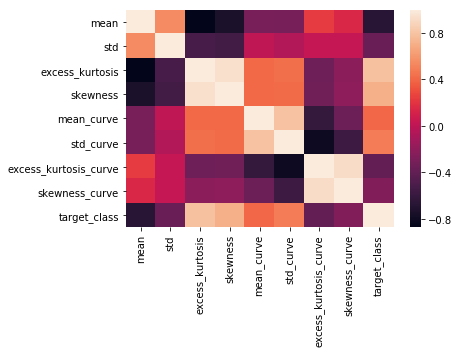

In [115]:
sns.heatmap(data.corr())

### Algorithms and Techniques


We'll use 4 different classifiers.
1. Logistic Regression
2. Support Vector Machines (SVM)
3. Ensemble Method (AdaBoost)
4. XGBoost

We'll be tuning the relevant hyperparameters for each of these classifiers. We'll use 5-fold cross validation. So, our data will be partitioned into 5 different buckets, and for each iteration, 4 of these shall be used as training set, and the remaining one will be used as testing set. We'll get average train and test score for this whole process. Now, as we are tuning the hyper-parameters, we'll get a grid of those params, and for each entry we'll be running the 5-fold cross validation. In the end we'll choose those hyperparameter for which our F-beta score will be maximum.

### Benchmark

As this is a classification problem, we can keep a naïve predictor (which considers all starts as non-pulsar) as a benchmark. This is because, almost 90% of our dataset consists of non-pulsars. We'll then compare our accuracy, precision/recall against that one. As we don’t want to lose out on actual pulsars, so we’d be giving more emphasis on recall than precision.

## III. Methodology

### Data Preprocessing
1. From initial observation, the dataset seems to be clean, so I presume there won’t be much need for data sanitization. We can directly use this data for exploration and visualization.
2. It is often good practice to perform normalization on numerical features, as it doesn't alter the feature's distribution and also ensures each feature is treated equally when applying supervised learners. We will use `sklearn.preprocessing.MinMaxScaler` for normalization.

In [116]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = features_raw.columns

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,mean,std,excess_kurtosis,skewness,mean_curve,std_curve,excess_kurtosis_curve,skewness_curve
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369


### Naive Predictor Performance
We're blindly saying all stars are pulsar. Here we're using beta = 2 because we care more about recall than precision.

In [117]:
from __future__ import division
from sklearn import metrics


TP = np.sum(target_raw)
FP = target_raw.count() - np.sum(target_raw)
TN = 0
FN = 0

accuracy = TP/(TP + FP)
recall = TP/(TP + FN)
precision = TP/(TP + FP)

# Calculate F-score using the formula above for beta = 2 and correct values for precision and recall.
fscore = (5 * precision * recall) / (4 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F-score: {:.4f}]".format(accuracy, precision, recall, fscore))

Naive Predictor: [Accuracy score: 0.0916, Precision: 0.0916, Recall: 1.0000, F-score: 0.3351]


### Implementation
#### Models of choice: Logistic Regression, SVM, AdaBoost and XGBoost.

**Logistic Regression**
- Real world application: 
    1. Image Segmentation and Categorization
    2. Geographic Image Processing
    3. Handwriting recognition
- Strength:
    1. The decision boundary it creates is a linear decision boundary that can be of any direction. So if we have data where the decision boundary is not parallel to the axes, then logistic regression picks it out pretty well, whereas a decision tree will have problems.
    2. Logistic regression is intrinsically simple, it has low variance and so is less prone to over-fitting.
- Weakness:
    1. Logistic regression attempts to predict outcomes based on a set of independent variables, but if we include the wrong independent variables, the model will have little to no predictive value.
    2. Logistic regression works well for predicting categorical outcomes like admission or rejection at a particular college, but it cannot predict continuous outcomes.
    3. Logistic regression requires that each data point be independent of all other data points. If observations are related to one another, then the model will tend to overweight the significance of those observations.
    4. Logistic regression attempts to predict outcomes based on a set of independent variables, but logit models are vulnerable to overconfidence.
    [source](https://classroom.synonym.com/disadvantages-logistic-regression-8574447.html)
- Why This model:
    * It's a good place to start with, because it's a simple baseline algorithm for binary classification, and it performs reasonably well even with its assumptions of independence.
    
    
**SVM**
- Real world application: Classification of images. Experimental results show that SVMs achieve significantly higher search accuracy than traditional query refinement schemes after just three to four rounds of relevance feedback. [source](https://en.wikipedia.org/wiki/Support_vector_machine)
- Strength: 
    1. It has a regularisation parameter, which makes the user think about avoiding over-fitting. 
    2. It uses the kernel trick, so we can build in expert knowledge about the problem via engineering the kernel. 
    3. An SVM is defined by a convex optimisation problem (no local minima) for which there are efficient methods (e.g. SMO). 
    4. Lastly, it is an approximation to a bound on the test error rate, and there is a substantial body of theory behind it which suggests it should be a good idea.
    [source](https://stats.stackexchange.com/questions/24437/advantages-and-disadvantages-of-svm#24440)
- Weakness:
    1. Requires full labeling of input data
    2. Uncalibrated class membership probabilities -- SVM stems from Vapnik's theory which avoids estimating probabilities on finite data
    3. The SVM is only directly applicable for two-class tasks. Therefore, algorithms that reduce the multi-class task to several binary problems have to be applied.
    4. Parameters of a solved model are difficult to interpret.
    5. Takes quite a while to learn, on a large dataset.
    [source](https://en.wikipedia.org/wiki/Support_vector_machine)
- Why This model:
    * Tried and tested algorithm for binary classification. Kernel trick can be employed to capture more complex relationships.
    

**Ensemble Methods (Adaboost)**
[source](https://en.wikipedia.org/wiki/AdaBoost)
- Real world application: 
    1. Face detection (Complex boundary detection)
    2. Image Processing    
- Strength:
    1. It's fast and adaptive.
    2. Less susceptible to overfitting.
    3. It can be used in conjunction with many other types of learning algorithms to improve performance.
- Weakness:
    1. Sensitive to noisy data, and outliers.
- Why This model:
    * It's a good model as our dataset is not that complex, and it usually gives more accuracy than simpler classification models (e.g. Logistic Regression)
    
**XGBoost**
[source](https://en.wikipedia.org/wiki/Xgboost)
- Real world application: 
    1. Any production systems using GBM can use XGBoost.
- Strength:
    1. Provides scalable, portable and distributed Gradient Boosting.
    2. it provides state-of-the-art performance for typical supervised machine learning problems.
- Weakness:
    1. It cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest.
- Why this model:
    * It usually beats the other boosting algorithms by a fair margin. It was the algorithm of choice for many winning teams of a number of machine learning competitions (e.g. Kaggle)
    
#### How do we proceed
1. We use K-fold cross validation with K=5. As our target data set is imbalanced (about 9% of stars in the data set are pulsars) we need to preserve a similar ratio in our train-test data sets. This is handled  by K-fold cross validation as by default it uses stratified sampling. 
2. For each of the classifiers we identified a parameter grid, which we are going to tune. For each combination of these hyper-parameters we run a K-fold cross validation and note down the average F-beta score. 
3. Whichever hyperparameters give the best score, are extracted out as the optimal estimator.
4. We compare all 4 optimal models and choose one that gives us the best F-beta score.

### Refinement
The refinement process is embedded in the gridsearch procedure, as it helps us finding the best set of hyper parameters.

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn import cross_validation
import warnings

warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# TODO: Initialize the classifier
clfr_A = LogisticRegression(random_state=128)
clfr_B = SVC(random_state=128)
clfr_C = AdaBoostClassifier(random_state=128)
clfr_D = XGBClassifier()

lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
adb_param_grid = {'n_estimators' : [50, 100, 150, 200, 250, 500],'learning_rate' : [.5, .75, 1.0, 1.25, 1.5, 1.75, 2.0]}
xgb_param_grid = {'colsample_bylevel': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0], 'learning_rate' : [.5, .75, 1.0, 1.25, 1.5, 1.75, 2.0]}

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
clfrs = [clfr_A, clfr_B, clfr_C, clf_D]
names = ["LogisticRegression", "SVM", "AdaBoost", "XGBoost"]
params = [lr_param_grid, svc_param_grid, adb_param_grid, xgb_param_grid]
scorer = {'acc': 'accuracy', 'F-beta': make_scorer(fbeta_score, beta = 0.5), 'prec_macro': 'precision_macro','rec_micro': 'recall_macro'}

stat_list = []

for clfr, param, name in zip(clfrs, params, names):
    grid_obj = GridSearchCV(clfr, param, cv=5, scoring=scorer, refit='F-beta', n_jobs=-1)
    grid_fit = grid_obj.fit(features_minmax_transform, target_raw)
    best_clf = grid_fit.best_estimator_

    dict = {}
    dict['model'] = name
    dict['mean_acc'] = str(grid_fit.cv_results_["mean_test_acc"].mean())
    dict['mean_precision'] = str(grid_fit.cv_results_["mean_test_prec_macro"].mean())
    dict['mean_recall'] = str(grid_fit.cv_results_["mean_test_rec_micro"].mean())
    dict['mean_f-beta'] = str(grid_fit.cv_results_["mean_test_F-beta"].mean())
    stat_list.append(dict)
    
print stat_list

/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3

/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_

/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.

/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_udacity/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/py2_

[{'mean_f-beta': '0.7512689089358641', 'model': 'LogisticRegression', 'mean_precision': '0.8889054836876458', 'mean_acc': '0.9607298501029644', 'mean_recall': '0.8011004857332923'}, {'mean_f-beta': '0.4976414958449544', 'model': 'SVM', 'mean_precision': '0.7857228934604635', 'mean_acc': '0.9408202033746788', 'mean_recall': '0.6839523686289998'}, {'mean_f-beta': '0.7837768512211324', 'model': 'AdaBoost', 'mean_precision': '0.8364843142824105', 'mean_acc': '0.8515024291088654', 'mean_recall': '0.8141367209627456'}, {'mean_f-beta': '0.84731026071335', 'model': 'XGBoost', 'mean_precision': '0.9193869932426746', 'mean_acc': '0.971542444220956', 'mean_recall': '0.9005733520660092'}]


## IV. Results

### Model Evaluation and Validation
I think, XGBoost is the most appropriate model, for identifying pulsars. The reasons being:
1. It has highest F-score across all proportions of testing sets.
2. It has highest accuracy across all proportions of testing sets.
3. SVM takes significant time to train, compared to XGBoost or AdaBoost, while giving slightly less F-score and accuracy.
4. Compared to Logistic Regression, the accuracy and F-scores are much better. It can also handle more complex relations among datapoints, compared to Logistic Regression.

Also, we used K-fold cross validation while training our model, so it generalizes much better than the situation, when one picks up a random train-test split. Because in that case, this model might have become lucky. But since, we've tested over a normalized set of train-test pairs, this model is much likely be better than the other 3 for unknown data sets too.

### Justification
The XGBoost F-beta score is way higher than the naive predictor which is expected. Compared to the other three model, it dominates the field in all accuracy, precision, recall and F-beta score, so it's a clear winner among all the models we've chosen to experiment with. The naive predictor has a recall score of 1, because it blindly classifies everything as pulsar, but it's low precision score brings down the F-beta score. In XGBoost, we have a good balance between both precision and recall.

## V. Conclusion

### Reflection
This was quite an interesting project to work on, as it gave me some new challenges to solve and reinforced some of my understanding regarding classifiers. To summarize, our input was a dataset with 8 input features and one target feature. The goal was to correctly classify objects as pulsar or non-pulsar. We used sklearn's gridsearchCV along with k-fold cross validation to find the optimal parameters of each model, and then choose the best model out of all four (Logistic Regression, SVM, AdaBoost and XGBoost). We found XGBoost was the best in class as it had the best F-beta score. This was kind of expected as this is one of the heavily used supervised learning models used in Kaggle. I struggled a bit on combining both grid search and k-fold cross validation in sklearn, but hopefully that got resolved.

### Improvement
I think there are quite a bit of room for improvement. E.g.
1. I'm not much familiar with stacking multiple models and create a custom ensemble model which tend to give better performance in general than the constituent models. I couldn't try that out because of my lack of knowledge in that front.
2. Almost each of these models provide a myriad of hyperparameters to tune, which can become overwhelming sometimes. From my limited knowledge in this area, I've chosen minimal set of parameters to tune, but obviously there're lot of room for improvement here.
3. Even if 2-3 features where heavily skewed, I didn't do a log transformation on those, to keep it simple. The log transformation might have reduced the adverse effect of outliers (if any).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.